# Analyzing Movie Review Scores
In this guided project, a dataset containing review scores from 4 leading movie review sites will be analyzed. 

In [8]:
import pandas as pd

movies = pd.read_csv('fandango_score_comparison.csv')

movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


Reviews are scored different between sites. Metacritic and Rotten Tomatoes both score theirs on a 100-point scale. IMDB scores their reviews on a 10 point scale. Fandango uses a 0-5 star system, which includes half stars.

To be able to compare the scores directly, the have been normalized and rounded to fit the Fandango 5-star system. As an example, "Do You Believe?" has a score of 18 on Rotten Tomatoes. When converted to a range of 0 to 5 stars it would be worth 0.9. Since Fandango only uses half or full stars in it's ratings, the 0.9 stars would be rounded to 1 full star.

Normalizing and rounding all the scores allows us to compare the scores directly as I did with a histogram. 

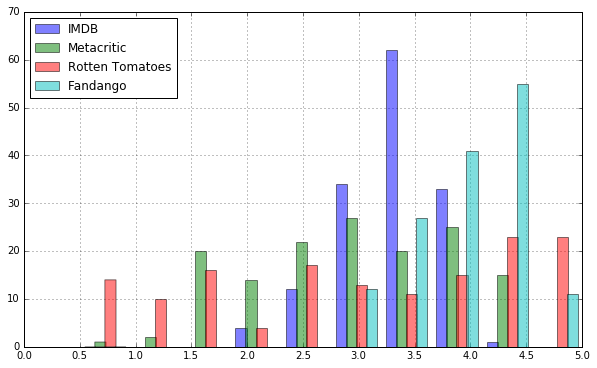

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fandango = movies['Fandango_Stars']
metacritic = movies['Metacritic_norm_round']
r_tomatoes = movies['RT_norm_round']
imdb = movies['IMDB_norm_round']

data = np.vstack([imdb, metacritic, r_tomatoes, fandango]).T
kwargs = dict(histtype='bar', alpha=0.5, width=0.10, normed=False, bins=10)

fig = plt.figure(figsize=(10,6))
plt.xlim(0, 5.0)
plt.xticks(np.arange(0,5.5,0.5))
plt.hist(data, label=['IMDB', 'Metacritic', 'Rotten Tomatoes', 'Fandango'], zorder=3, **kwargs)

plt.legend(loc='upper left')
plt.grid(zorder=0)

plt.show()

The histogram shows that Rotten Tomato reviews are somewhat uniformly distributed, Metacritic reviews are platykurtic, and IMDB reviews are leptokurtic. The Fandango data stands out because it is negative skewed and it's lowest value is 3.0. Let's look at the descriptive statistics to measure the difference we see in this graph.

In [10]:
desc_table = pd.DataFrame(columns=['Mean', 'Standard Dev.', 'Median'])

websites= ['Fandango_Stars', 'Metacritic_norm_round', 'RT_norm_round', 'IMDB_norm_round']

for site in websites:
    mean = np.mean(movies[site])
    median = np.median(movies[site])
    std = np.std(movies[site])
    
    desc_table.loc[len(desc_table)] = [mean, std, median]
    
desc_table = desc_table.set_index([['Fandango', 'Metacritic', 'Rotten Tomatoes', 'IMDB']])
desc_table = desc_table.round(2)
desc_table.sort_values('Mean', inplace=True, ascending=False)
    
desc_table

,Mean,Standard Dev.,Median
Fandango,4.09,0.54,4.0
IMDB,3.38,0.50,3.5
Rotten Tomatoes,3.07,1.51,3.0
Metacritic,2.97,0.99,3.0


The descriptive statistics show us that the Fandango mean and median scores are higher, and it's variance one of the lowest. The mean Fandango score is also higher than it's median which tells us that there are a few high scores that skew the mean upwards. 

Next, we will examine how the Fandango scores covary with Metacritic by creating a scatterplot.

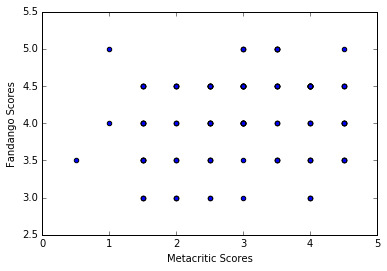

In [11]:
plt.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
plt.xlabel("Metacritic Scores")
plt.ylabel("Fandango Scores")
plt.show()

Because the metacritic scores were normalized and rounded to match the scale of the Fandango scores, this scatterplot looks a little strange. As the numbers grow on the x-axis we would expect the the Fandango scores to rise as well. However, the dots in the scatterplot form a rectangle which suggests very little relationship between the two review scores. 

Let's look at some of the more unusual score differences. 

In [12]:
movies['fm_diff'] = movies['Fandango_Stars'] - movies['Metacritic_norm_round']
movies['fm_diff'] = movies['fm_diff'].apply(abs)
movies.sort_values('fm_diff', ascending=False, inplace=True)

movies[['FILM','fm_diff', 'Fandango_Stars', 'Metacritic_norm_round']].head()

,FILM,fm_diff,Fandango_Stars,Metacritic_norm_round
3,Do You Believe? (2015),4.0,5.0,1.0
85,Little Boy (2015),3.0,4.5,1.5
47,Annie (2014),3.0,4.5,1.5
19,Pixels (2015),3.0,4.5,1.5
134,The Longest Ride (2015),3.0,4.5,1.5


*Do You Believe?* has a 4 star difference in review scores and can be seen plainly in the above scatterplot. The mean difference is 1.3 points.

Next let's determine, mathematically, how correlated the reviews are. 

In [13]:
from scipy.stats import pearsonr, linregress

correlation = pearsonr(movies['Fandango_Stars'], movies['Metacritic_norm_round'])
print("Correlation = ", correlation[0])
print("Two-tailed p-value = ", correlation[1])
print('\n')
slope, intercept, pvalue, rvalue, stderr = linregress(
    movies['Metacritic_norm_round'], movies['Fandango_Stars'])

print('The regression line is y = ',slope, "x + ", intercept)
print('Predicting a Fandango score given a Metacritic score of 3')
score = slope * 3 + intercept
print('The predicted score is ' , score)

Correlation =  0.178449190739
Two-tailed p-value =  0.0311615162285


The regression line is y =  0.0973110779739 x +  3.7997739189
Predicting a Fandango score given a Metacritic score of 3
The predicted score is  4.09170715282


There is a very low correlation between between Metacritic and Fandango which means that not only are Fandango scores inflated but their reviews are also scored in a fundamentally different way. The slope and intercept of the line of best fit was also calculated. Next we will draw it onto our scatter plot. 

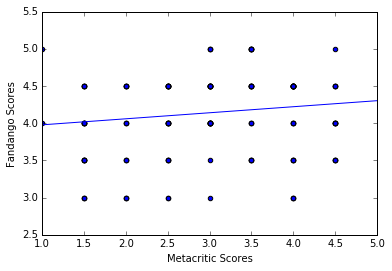

In [14]:
scores = {
         0:0,
         1:0,
         2:0,
         3:0,
         4:0,
         5:0,
         6:0}

for score in scores.keys():
    pred = slope * score + intercept
    scores[score] = pred

plt.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
plt.plot([0.0, 6.0], [scores[1], scores[6]])
plt.xlabel("Metacritic Scores")
plt.ylabel("Fandango Scores")
plt.xlim(1,5)
plt.show()


As the poor correlation would have us expect, our line of best fit is a very poor predictor of movie scores. 

According to the FiveThirtyEight analysis(which is where this dataset is from), Fandango sells tickets directly to it's viewers and so it is in their interest to get people excited with favourable reviews. Their analysis found that they rounded movies up a half star even when rounding logic would mean the score should have been rounded downward. They also suggest that viewers may also be relieving the cognitive dissonance they experienced from having paid $15 dollars to see a bad film by giving movies a higher score. 